<a href="https://colab.research.google.com/github/Abdelrahman-Wael-1029/Supervised_assignments/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Load the data from the uploaded CSV file into a DataFrame
iris_df = pd.read_csv("Iris.csv", index_col = 'Id')

# Display the first 5 rows of the DataFrame
iris_df.head(6)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
# get info data
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [ ]:
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [ ]:
iris_df.describe(include='object').T

,count,unique,top,freq
Species,150,3,Iris-setosa,50


In [ ]:
sns.set_theme()

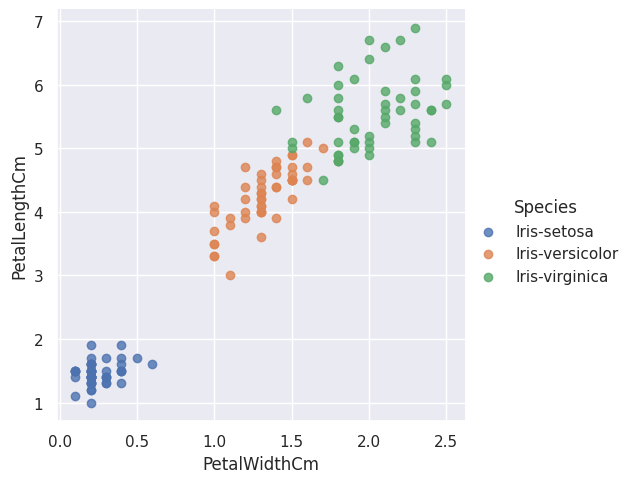

In [ ]:
sns.lmplot(iris_df, x = 'PetalWidthCm', y = 'PetalLengthCm', hue = 'Species',fit_reg=False)

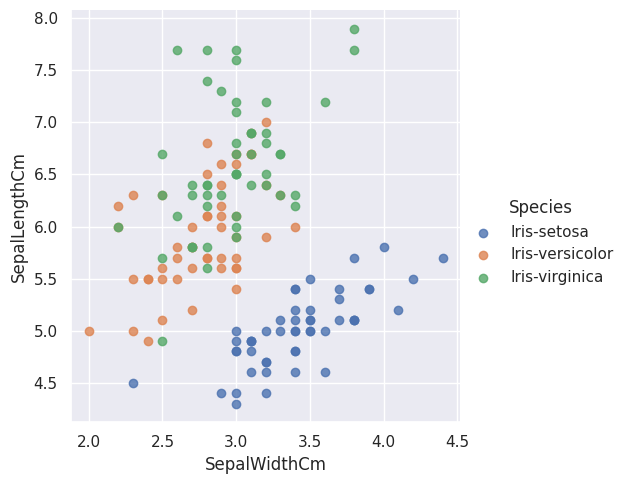

In [ ]:
sns.lmplot(iris_df, x = 'SepalWidthCm', y = 'SepalLengthCm', hue = 'Species',fit_reg=False)

In [ ]:
# split the features from labels into x and y prespectivly
X = iris_df.iloc[:,[0 , 1 , 2 , 3]].values
Y = iris_df.iloc[:,4].values

label_encoder = LabelEncoder()

# make y numeric arrays
Y = label_encoder.fit_transform(Y)

In [ ]:
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [ ]:
#split the data into train and test
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2, random_state = 42)

In [ ]:
# euclidean distance between two given points (x_train , x_test_point)
def euclidean_distance(x_test_point):
    distances = []

    for row in range(len(X_train)):

        distances.append(np.sqrt(np.sum((x_test_point -  X_train[row]) ** 2)))

    distances = pd.DataFrame(data = distances , columns = ['dist'])
    distances = distances.sort_values(by = ['dist'] , axis = 0)

    return distances

In [ ]:
# manhattan distance between two given points (x_train , x_test_point)
def manhattan_distance(x_test_point):
    distances = []

    for row in range(len(X_train)):
        distances.append(np.sum(np.abs(x_test_point - X_train[row])))

    distances = pd.DataFrame(data = distances , columns = ['dist'])
    distances = distances.sort_values(by = ['dist'] , axis = 0)

    return distances

In [ ]:
# cosine similarity : x1 . x2 / ||x1|| * ||x2||
def cos_similarity(x_test_point):
    distances = []

    # loop for all rows
    for row in range(len(X_train)):
        current_training_point = X_train[row]

        distances.append(np.dot(x_test_point , current_training_point) / (np.linalg.norm(current_training_point) *np.linalg.norm(x_test_point) ))

    # sort it in descending order
    distances = pd.DataFrame(data = distances , columns = ['dist'])
    distances = distances.sort_values(by='dist', axis=0, ascending = False)

    return distances

In [ ]:
class KNeighborsClassifier:
    def __init__(self, k = 3):
        self.k = k

    def fit(self,X,y,distanceMetrics ='Euclidean'):
        self.X = X
        self.y = y
        self.distanceMetrics = distanceMetrics

    def predict(self, X_test):
        y_pred = []
        for x_test_point in X_test:
            distances = self.getDistance(x_test_point)
            distances = self.nearst_neighbors(distances)
            y_pred_point = self.voting(distances)
            y_pred.append(y_pred_point)

        y_pred = np.array(y_pred)
        return y_pred

    def getDistance(self, x_test_point):
       match self.distanceMetrics:
          case 'Euclidean':
            return  euclidean_distance(x_test_point)

          case 'Manhattan':
            return  manhattan_distance(x_test_point)

          case 'Cosine':
            return  cos_similarity(x_test_point)

    # helpfull function to return the first k of a given array
    def nearst_neighbors(self,distances):

        df_nearst = distances
        df_nearst = df_nearst[ : self.k]

        return df_nearst

    def voting(self, nearst_k_distances):

        counter_vote = Counter(self.y[nearst_k_distances.index])
        y_pred = counter_vote.most_common()[0][0]

        return y_pred
    def accuracy(self, y_test , y_pred):
      return 1 - np.sum(y_test != y_pred) / len(y_pred)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
y_pre = model.predict(X_test)
model.accuracy(y_pre, Y_test)

Counter({1: 3})
[(1, 3)]
Counter({0: 3})
[(0, 3)]
Counter({2: 3})
[(2, 3)]
Counter({1: 3})
[(1, 3)]
Counter({1: 3})
[(1, 3)]
Counter({0: 3})
[(0, 3)]
Counter({1: 3})
[(1, 3)]
Counter({2: 3})
[(2, 3)]
Counter({1: 2, 2: 1})
[(1, 2), (2, 1)]
Counter({1: 3})
[(1, 3)]
Counter({2: 2, 1: 1})
[(2, 2), (1, 1)]
Counter({0: 3})
[(0, 3)]
Counter({0: 3})
[(0, 3)]
Counter({0: 3})
[(0, 3)]
Counter({0: 3})
[(0, 3)]
Counter({1: 3})
[(1, 3)]
Counter({2: 3})
[(2, 3)]
Counter({1: 3})
[(1, 3)]
Counter({1: 3})
[(1, 3)]
Counter({2: 3})
[(2, 3)]
Counter({0: 3})
[(0, 3)]
Counter({2: 3})
[(2, 3)]
Counter({0: 3})
[(0, 3)]
Counter({2: 3})
[(2, 3)]
Counter({2: 3})
[(2, 3)]
Counter({2: 3})
[(2, 3)]
Counter({2: 3})
[(2, 3)]
Counter({2: 3})
[(2, 3)]
Counter({0: 3})
[(0, 3)]
Counter({0: 3})
[(0, 3)]


1.0

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, Y_train, 'Manhattan')
y_pre = model.predict(X_test)
model.accuracy(y_pre, Y_test)

1.0

In [ ]:
model = KNeighborsClassifier(k = 5)
model.fit(X_train, Y_train, 'Cosine')
y_pre = model.predict(X_test)
model.accuracy(y_pre, Y_test)

1.0